# Introdction to pyjeo: installation and raster visualization

**Material provided by Dr. Pieter Kempeneers**

[pyjeo](https://jeodpp.jrc.ec.europa.eu/services/processing/pyjeohelp/) is the follow up of [PKTOOLS](http://pktools.nongnu.org/html/index.html), a suite of utilities written in C++ for image processing with a focus on remote sensing applications. It is distributed under a General Public License (GPLv3) as a Python package.

The examples in this notebook replicate the exercises on [pktools](http://spatial-ecology.net/docs/build/html/PKTOOLS/pktools_osgeo.html) in order to appreciate the difference and still analogy for those that are familiar with pktools.

In a nutshell, the main differences between pyjeo and pktools from a user's perspective are:

- pyjeo is a Python package should be run in a **Python environment**, whereas pktools applications are run from the command line (e.g., in a bash shell)
- pyjeo runs with images entirely **in memory**, whereas pktools runs most applications line per line. This makes pyjeo considerably faster, but with a larger memory footprint. However, there are some methods implemented in pyjeo to reduce the memory footprint by tiling the image


Runn the following script to perform the installation of pyjeo

    
    cd /tmp/
    wget https://raw.githubusercontent.com/selvaje/SE_data/main/exercise/install_pyjeo.sh
    sudo bash install_pyjeo.sh



Import Python modules

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pyjeo as pj

## Jim: a geospatial raster dataset object

Open an image and show its properties

In [2]:
jim = pj.Jim('geodata/vegetation/ETmean08-11.tif')

In [3]:
jim.properties.nrOfCol()

720

In [4]:
jim.properties.nrOfPlane()

1

In [5]:
jim.properties.getProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [6]:
jim.properties.getGeoTransform()

[29.0, 0.00833333334, 0.0, 4.000000004, 0.0, -0.00833333334]

Bridging to Numpy array

In [7]:
jim.np()

array([[ 3.9031930e+00,  4.1704483e+00,  4.4033966e+00, ...,
        -3.4000000e+38,  8.0441576e-01,  7.9959238e-01],
       [ 3.9995923e+00,  3.7383151e+00,  4.3366170e+00, ...,
         7.8573370e-01,  8.0271739e-01,  8.0427992e-01],
       [ 3.8954484e+00,  4.0010872e+00,  4.0186820e+00, ...,
         7.9300272e-01,  8.0869567e-01,  8.2391304e-01],
       ...,
       [ 3.9974184e+00,  3.9528532e+00,  2.3230300e+00, ...,
         3.3593750e+00,  3.2286685e+00,  3.0525136e+00],
       [ 3.8603940e+00,  2.3833561e+00,  2.3200407e+00, ...,
         3.5756793e+00,  3.2909646e+00,  3.3271060e+00],
       [ 3.8717391e+00,  3.2824049e+00,  3.4489131e+00, ...,
         3.6081522e+00,  3.5593750e+00,  3.5692935e+00]], dtype=float32)

A numpy array is not a geospatial dataset

In [8]:
type(jim.np())

numpy.ndarray

**Get items**

With pyjeo we create the masks in memory in a "pythonic" way using [get items](https://jeodpp.jrc.ec.europa.eu/services/processing/pyjeohelp/3_reference.html#get-jim-items) without the need to write temporary files.

Get sub-dataset based on pixel coordinates (first 3 rows and columns, starting from 0)

In [9]:
jim[0:3,0:3]

Last 3 rows and columns, show geographic bounding box [ulx, uly, lrx, lry]

In [10]:
jim[-3:,-3:].properties.getBBox()

[34.97500000478, -0.9749999999800003, 35.0000000048, -1.0000000000000002]

In [11]:
jim[0:3,0:3].np()

array([[3.903193 , 4.1704483, 4.4033966],
       [3.9995923, 3.738315 , 4.336617 ],
       [3.8954484, 4.001087 , 4.018682 ]], dtype=float32)

**Set items**

In pyjeo, we can apply the mask in a "pythonic" way using [set items](https://jeodpp.jrc.ec.europa.eu/services/processing/pyjeohelp/3_reference.html#set-jim-items)

In [12]:
jim[0:3,0:3] = 0
jim[0:5,0:5].np()

array([[0.       , 0.       , 0.       , 4.5625   , 4.419769 ],
       [0.       , 0.       , 0.       , 3.9793477, 4.114334 ],
       [0.       , 0.       , 0.       , 4.02894  , 3.8538043],
       [4.3265624, 4.3577447, 4.1216035, 3.8828125, 3.6519022],
       [3.9654212, 4.1422553, 4.012704 , 4.0539403, 3.761413 ]],
      dtype=float32)

**Display image using matplotlib**

We can show an image with matplotlib by providing a Numpy representation of the dataset

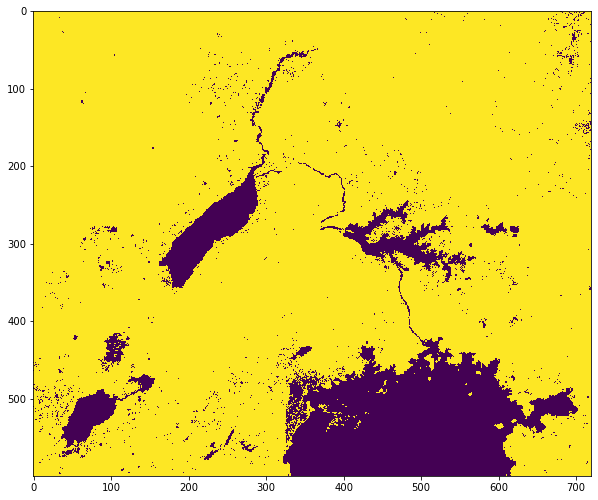

In [13]:
# plt.gray()  # show the filtered result in grayscale
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.imshow(jim.np())
plt.show()

This is not what we expected, let's inspect the image statistics

In [14]:
jim.stats.getStats(src_min=0)

{'max': 7.49226, 'mean': 2.95201, 'min': 0.0}

We can either stretch the image, or show pixel values > 0 (pixel values < 0 are set to 0)

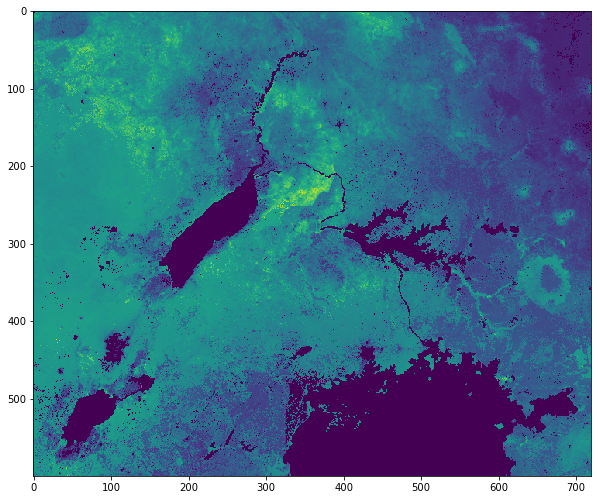

In [15]:
# plt.gray()  # show the filtered result in grayscale
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.imshow((jim[jim>0]).np())
plt.show()